In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

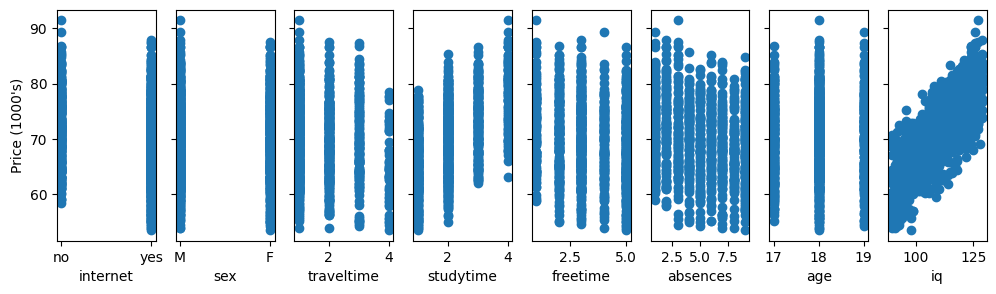

array([[0.0, 1.0, 2, ..., 6, 18, 118],
       [1.0, 1.0, 2, ..., 7, 19, 107],
       [1.0, 1.0, 3, ..., 5, 18, 108],
       ...,
       [1.0, 1.0, 2, ..., 5, 17, 123],
       [1.0, 0.0, 1, ..., 8, 17, 104],
       [1.0, 1.0, 1, ..., 6, 18, 128]], dtype=object)

In [69]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)
x_features=['internet' ,'sex',	'traveltime',	'studytime'	,'freetime'	,'absences',	'age'	,'iq'	,'marks']


# Try plotting y_train with different features
fig,ax=plt.subplots(1, 8, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train)
    ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

# To get an idea whether to add some features or not
# Add some features if required in x_train

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):
    for j in range (x_train.shape[0]):
        if x_train[j,0]=='yes':
            x_train[j,0]=float(1)
        else:
            x_train[j,0]=float(0)
    for j in range (x_train.shape[0]):
        if x_train[j,1]=='M':
            x_train[j,1]=float(1)
        else:
            x_train[j,1]=float(0) 
           # x_train=x_train.astype(float)
    return x_train
x_train = feature_changing(x_train)

In [70]:
def z_score(x_train):

  # ---------
    # write the code for feature scaling here
    x_mean=np.mean(x_train,axis=0)
    x_std=np.std(x_train,axis=0)
    x_train=(x_train-x_mean)/x_std
    # Your code here
  # ---------

    return x_train,x_std,x_mean

In [71]:
def cost(x_train,y_train,w,b):

  # ---------
    # Your code here
    cost=0
    m=x_train.shape[0]
    for i in range(m):
        cost+=((np.dot(x_train[i],w)+b)-y_train[i])**2
    # Use mean square error as cost function
    # return cost
  # ---------

    return cost

In [72]:
def gradient_descent(x_train,y_train,w,b):

  # ---------
    # Your code here
    # Choose learning rate yourself
    m=x_train.shape[0]
    dj_dw=np.zeros((x_train.shape[1],1))
    dj_db=0
    lr=0.1
    for i in range (x_train.shape[0]):
        err=(np.dot(x_train[i],w)+b-y_train[i])
        for j in range(x_train.shape[1]):
            dj_dw[j]=dj_dw[j]+err*x_train[i,j]
        dj_db+=err
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    w-=lr*dj_dw
    b-=lr*dj_db
        
  # ---------

    return w,b

In [73]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)*0.1
b = np.random.randn(1)

old_cost = 0
iterations=0
max_iterations=100000

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001 and iterations<max_iterations:
    old_cost = cost(x_train,y_train,w,b)
    w,b = gradient_descent(x_train,y_train,w,b)
    iterations+=1
    #if iterations % 1000 == 0:
        # print(f"Iteration {iterations}: Cost = {cost(x_train, y_train, w, b)}")
x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
    if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
        accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
